In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# matplotlib 기본 설정
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [3]:
# 학습 결과 plotting 함수
# loss 출력 함수
def plot_loss(epochs, history):
    plt.figure(figsize=(7,6))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
# Accuracy 출력 함수
def plot_acc(epochs, history):
    plt.figure(figsize=(7,6))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')    
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### 데이터 로딩

In [5]:
(train_img, train_label), (test_img, test_label) = keras.datasets.mnist.load_data()
train_img.shape, test_img.shape

((60000, 28, 28), (10000, 28, 28))

### 하이퍼파라미터, 변수 정의

In [24]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

# 데이터 개수
N_TRAIN = train_img.shape[0]
N_TEST = test_img.shape[0]

### 전처리
- image: 0 ~ 1로 정규화
- label: one hot encoding

In [7]:
X_train = (train_img/255.0).astype(np.float32)
X_test = (test_img/255.0).astype(np.float32)

In [8]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [10]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test), X_train.dtype

(0.0, 1.0, 0.0, 1.0, dtype('float32'))

In [11]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Dataset 생성

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

## 모델의 크기 변경에 따른 차이

In [15]:
# smaller model
def create_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=8, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [19]:
model = create_small_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)   # N_EPOCHS = 50

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.8828 - accuracy: 0.7239 - val_loss: 0.4334 - val_accuracy: 0.8764
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8856 - val_loss: 0.3540 - val_accuracy: 0.8985
Epoch 3/50
600/600 [==============================] - 2s 2ms/step - loss: 0.3500 - accuracy: 0.9002 - val_loss: 0.3227 - val_accuracy: 0.9083
Epoch 4/50
600/600 [==============================] - 2s 2ms/step - loss: 0.3234 - accuracy: 0.9083 - val_loss: 0.3122 - val_accuracy: 0.9116
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.9140 - val_loss: 0.2966 - val_accuracy: 0.9164
Epoch 6/50
600/600 [==============================] - 2s 2ms/step - loss: 0.2961 - accuracy: 0.9169 - val_loss: 0.2906 - val_accuracy: 0.9182
Epoch 7/50
600/600 [==============================] - 2s 2ms/step - loss: 0.2887 - accuracy: 0.9190 - val_loss: 0.2861 - val_accuracy: 0.9196
Epoch 

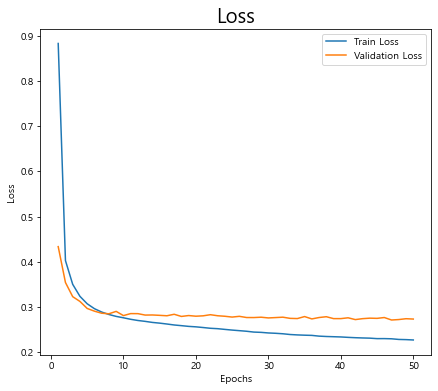

In [22]:
plot_loss(N_EPOCHS, hist)

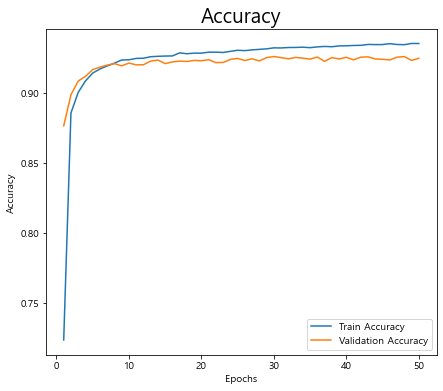

In [23]:
plot_acc(N_EPOCHS, hist)

In [25]:
# bigger model
# hidden layer: dense - 4개, 각각 units=256, 256, 128, 128, activation='relu'
def create_big_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [26]:
model = create_big_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [28]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)   # N_EPOCHS = 20

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2436 - accuracy: 0.9277 - val_loss: 0.1239 - val_accuracy: 0.9588
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0952 - accuracy: 0.9707 - val_loss: 0.1006 - val_accuracy: 0.9681
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0932 - val_accuracy: 0.9718
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0509 - accuracy: 0.9835 - val_loss: 0.0876 - val_accuracy: 0.9745
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0837 - val_accuracy: 0.9763
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0863 - val_accuracy: 0.9780
Epoch 

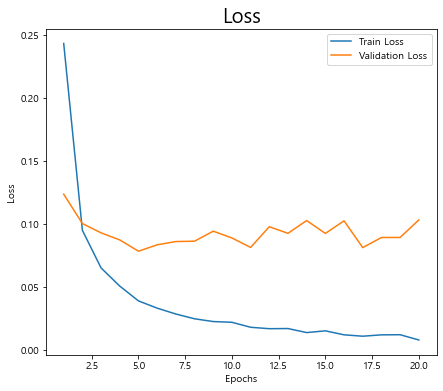

In [29]:
plot_loss(N_EPOCHS, hist)

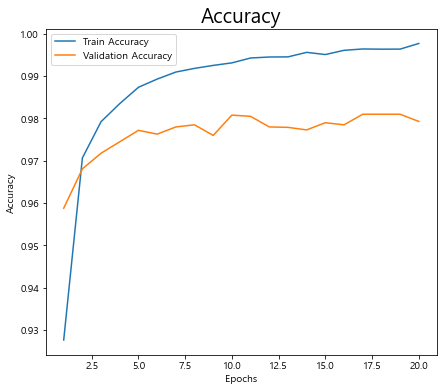

In [30]:
plot_acc(N_EPOCHS, hist)

In [31]:
def create_biggest_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=2048, activation='relu'))
    model.add(layers.Dense(units=2048, activation='relu'))
    
    model.add(layers.Dense(units=1024, activation='relu'))
    model.add(layers.Dense(units=1024, activation='relu'))
    
    model.add(layers.Dense(units=512, activation='relu'))
    model.add(layers.Dense(units=512, activation='relu'))
    
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [32]:
model = create_biggest_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

In [34]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)   # N_EPOCHS = 20

Epoch 1/20
600/600 [==============================] - 101s 167ms/step - loss: 0.2844 - accuracy: 0.9174 - val_loss: 0.1509 - val_accuracy: 0.9618
Epoch 2/20
600/600 [==============================] - 100s 167ms/step - loss: 0.1282 - accuracy: 0.9674 - val_loss: 0.1251 - val_accuracy: 0.9724
Epoch 3/20
600/600 [==============================] - 98s 163ms/step - loss: 0.0910 - accuracy: 0.9782 - val_loss: 0.0976 - val_accuracy: 0.9756
Epoch 4/20
600/600 [==============================] - 95s 158ms/step - loss: 0.0757 - accuracy: 0.9809 - val_loss: 0.1168 - val_accuracy: 0.9733
Epoch 5/20
600/600 [==============================] - 96s 160ms/step - loss: 0.0734 - accuracy: 0.9829 - val_loss: 0.1007 - val_accuracy: 0.9786
Epoch 6/20
600/600 [==============================] - 94s 156ms/step - loss: 0.0537 - accuracy: 0.9869 - val_loss: 0.1385 - val_accuracy: 0.9721
Epoch 7/20
600/600 [==============================] - 93s 154ms/step - loss: 0.0551 - accuracy: 0.9868 - val_loss: 0.1063 - val_

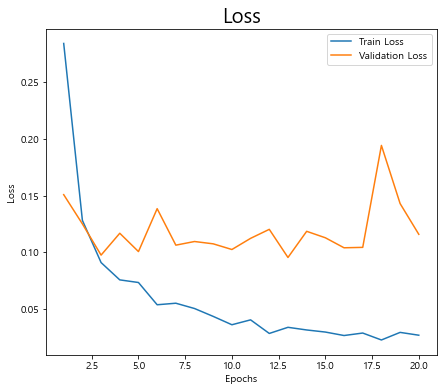

In [35]:
plot_loss(N_EPOCHS, hist)

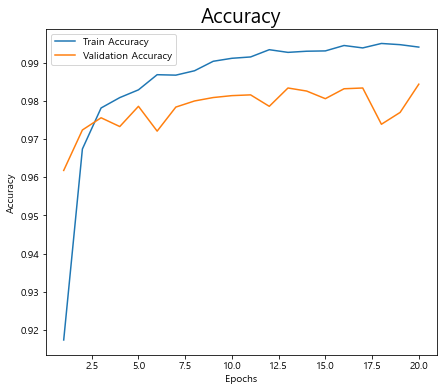

In [36]:
plot_acc(N_EPOCHS, hist)

## Dropout 예제
- dropout을 각 레이어에 적용
    - layers.Dropout 객체를 사용
    - 객체 생성 시 dropout_rate 설정: 보통 0.2 ~ 0.5를 지정
    - Drop시킬 노드를 가진 layer 앞에 추가함

In [41]:
DROPOUT_RATE = 0.3   # 모든 dropout 레이어에 동일한 비율을 지정. 몇 개의 노드를 dropout 시킬지

def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(rate=DROPOUT_RATE))    # 학습 시에만 작동함. (검증, test, 새로운 데이터 추론할 때는 적용 안 됨.)
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(rate=DROPOUT_RATE))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(rate=DROPOUT_RATE))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(rate=DROPOUT_RATE))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(rate=DROPOUT_RATE))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [42]:
model = create_dropout_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [43]:
# dropout을 사용하는 경우 Epoch 수를 늘려준다.
# 기존 epoch 수에 dropout 비율만큼을 더한 정도로.
# N_EPOCHS*DROPOUT_RATE

hist = model.fit(train_dataset, epochs=N_EPOCHS+6, validation_data=test_dataset)   # N_EPOCHS = 20

Epoch 1/26
600/600 [==============================] - 7s 10ms/step - loss: 0.5764 - accuracy: 0.8185 - val_loss: 0.1702 - val_accuracy: 0.9480
Epoch 2/26
600/600 [==============================] - 6s 10ms/step - loss: 0.2654 - accuracy: 0.9239 - val_loss: 0.1176 - val_accuracy: 0.9645
Epoch 3/26
600/600 [==============================] - 7s 11ms/step - loss: 0.2120 - accuracy: 0.9391 - val_loss: 0.1033 - val_accuracy: 0.9677
Epoch 4/26
600/600 [==============================] - 7s 11ms/step - loss: 0.1853 - accuracy: 0.9478 - val_loss: 0.0907 - val_accuracy: 0.9739
Epoch 5/26
600/600 [==============================] - 7s 11ms/step - loss: 0.1655 - accuracy: 0.9517 - val_loss: 0.0909 - val_accuracy: 0.9720
Epoch 6/26
600/600 [==============================] - 7s 11ms/step - loss: 0.1538 - accuracy: 0.9560 - val_loss: 0.0763 - val_accuracy: 0.9754
Epoch 7/26
600/600 [==============================] - 7s 11ms/step - loss: 0.1395 - accuracy: 0.9598 - val_loss: 0.0781 - val_accuracy: 0.9770

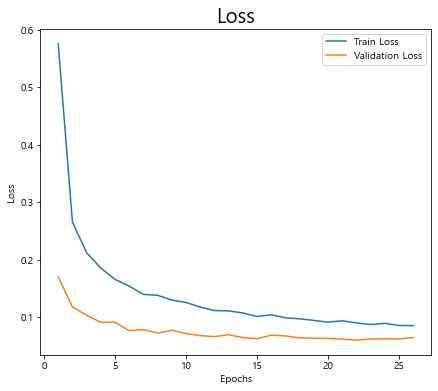

In [44]:
plot_loss(N_EPOCHS+6, hist)

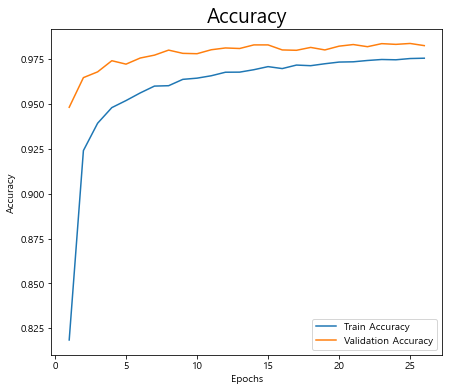

In [45]:
plot_acc(N_EPOCHS+6, hist)

## Batch Normalization
- 레이어 배치 순서: Dense -> BN -> Activation
- layers.BatchNormalization(momentum, scale, epsilon) - 다 디폴트 값 쓰면 됨
    - momentum: z score에 곱해주는 초기값(감마)
    - scale: z score에 더해주는 초기값(베타)
    - epsilon: z score 계산 시 분산값에 더해주는 값. 기본적으로 0.001을 씀

In [50]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256))   # wX+b 작업을 실행
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())   # activation 함수
    
    model.add(layers.Dense(units=256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    return model

In [51]:
model = create_bn_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 256)              

In [52]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)   # N_EPOCHS = 20

Epoch 1/20
600/600 [==============================] - 9s 12ms/step - loss: 0.3867 - accuracy: 0.9375 - val_loss: 0.1993 - val_accuracy: 0.9689
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.1642 - accuracy: 0.9720 - val_loss: 0.1285 - val_accuracy: 0.9730
Epoch 3/20
600/600 [==============================] - 7s 12ms/step - loss: 0.1064 - accuracy: 0.9793 - val_loss: 0.0896 - val_accuracy: 0.9759
Epoch 4/20
600/600 [==============================] - 8s 12ms/step - loss: 0.0747 - accuracy: 0.9844 - val_loss: 0.0840 - val_accuracy: 0.9763
Epoch 5/20
600/600 [==============================] - 6s 11ms/step - loss: 0.0594 - accuracy: 0.9870 - val_loss: 0.0724 - val_accuracy: 0.9808
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0491 - accuracy: 0.9882 - val_loss: 0.0798 - val_accuracy: 0.9777
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0409 - accuracy: 0.9903 - val_loss: 0.0729 - val_accuracy: 0.9799


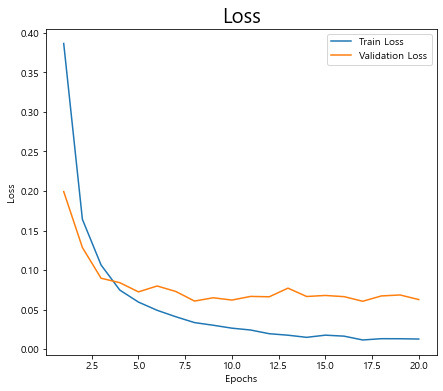

In [53]:
plot_loss(N_EPOCHS, hist)

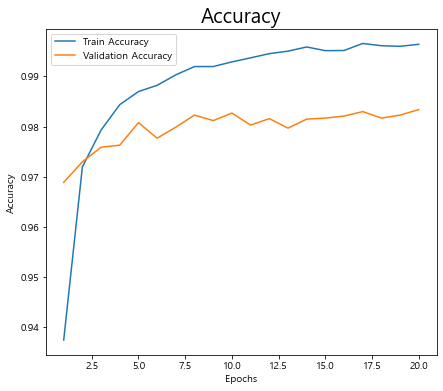

In [54]:
plot_acc(N_EPOCHS, hist)